# Principal component analysis (SKL)
Unsupervised dimensionality reduction

## Setting up

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target

# Create DataFrame with features
dfX = pd.DataFrame(X)
dfX.columns = dataObj.feature_names
display(dfX.head())
print(dfX.shape)

# Standardize the original dataset (very important)
sc = StandardScaler()
X_std = sc.fit_transform(X)
temp = pd.DataFrame(data=X_std, columns=dfX.columns)
display(temp.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Exploring PCA

### Choose number of principle components 
- `Max = n_features-1`
- Here, `max = 13`

In [2]:
n_components = 13

### Setting up

In [3]:
from sklearn.decomposition import PCA

# Creating Object
pca = PCA(n_components=n_components)

# Fitting
pca.fit(X_std)

PCA(n_components=13)

### Transformation matrix
Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by `explained_variance_`.

In [4]:
# Name of the column
cols = [f'nu_{i}' for i in range(1,n_components+1) ]

# The dimensions of "W" in SKL library is the tranpose of our convention.
W = np.transpose(pca.components_)

dfW = pd.DataFrame(data=W, columns=cols, index=dfX.columns)

display(dfW)


,nu_1,nu_2,nu_3,nu_4,nu_5,nu_6,nu_7,nu_8,nu_9,nu_10,nu_11,nu_12,nu_13
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
color_intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


### Explained variance
Equal to `n_components` largest eigenvalues of the covariance matrix of X.

In [5]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

### Explained variance ratio
Percentage of variance explained by each of the selected components.

In [6]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


### Visualize explained variance ratio

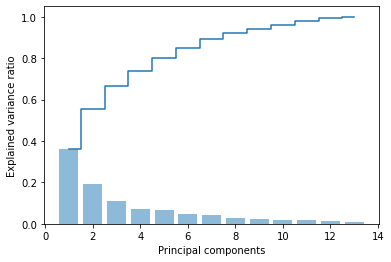

In [7]:
plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

### Transformation
$Z=XW$

In [8]:
# Columns names
cols = [f'pca_{i}' for i in range(1,n_components+1) ]

# Transformation from SKL
X_std_pca = pca.transform(X_std)
print('From SKL')
display(pd.DataFrame(data=X_std_pca, columns=cols).head())

# Verification
Z = X_std.dot(W)
print('Verification')
display(pd.DataFrame(data=Z, columns=cols).head())

From SKL


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


Verification


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


## Using PCA as visualization tool

### Without PCA

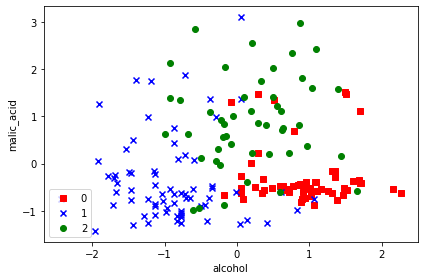

In [9]:
colors = ["r", "b", "g"]
markers = ["s", "x", "o"]
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std[y == l, 0], X_std[y == l, 1], c=c, label=l, marker=m)
ax.set_xlabel(dfX.columns[0])
ax.set_ylabel(dfX.columns[1])
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

### With PCA

In [10]:
X_std_pca = PCA(n_components=2).fit_transform(X_std)

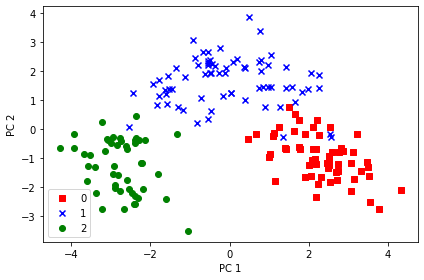

In [11]:
colors = ["r", "b", "g"]
markers = ["s", "x", "o"]
fig, ax = plt.subplots()
for l, c, m in zip(np.unique(y), colors, markers):
    ax.scatter(X_std_pca[y == l, 0], X_std_pca[y == l, 1], c=c, label=l, marker=m)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend(loc="lower left")
plt.tight_layout()
plt.show()

## Experiment with classifier

### Setting up

In [12]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF

paramSetAll = {
    "lr": {"clf": LR, "solver": "liblinear", "C": 10000, "max_iter": 100},
    "knn": {"clf":KNN, "n_neighbors": 5, "p": 1, "algorithm": "auto",},
    "dt": {"clf":DT, "criterion": "gini", "max_depth": 100},
    "rf": {"clf": RF,
        "criterion": "gini",
        "n_estimators": 100,
        "max_samples": None,
        "max_features": "auto",
        "max_depth": None,
    },
}

In [13]:
def training(X_train, y_train, X_test, y_test):

    for name, paramsSet in paramSetAll.items():

        clf = paramsSet['clf']
        params = { k:v for k, v in paramsSet.items() if k != 'clf' }

        #clf = LogisticRegression()
        clf = clf(**params)

        # Training
        clf.fit(X_train, y_train)

        # Accuracy scores
        y_pred = clf.predict(X_train)
        acc_train = accuracy_score(y_train, y_pred)

        y_pred = clf.predict(X_test)
        acc_test = accuracy_score(y_test, y_pred)

        print(f'Classifier: {name:5s}, Train Acc: {acc_train:4.2f}, Test Acc: {acc_test:4.2f}')
    print(f"--------------------------------------------------")

In [14]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardize
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std.shape)

(124, 13)


### No transformation

In [15]:
training(X_train_std, y_train, X_test_std, y_test)

Classifier: lr   , Train Acc: 1.00, Test Acc: 1.00
Classifier: knn  , Train Acc: 0.97, Test Acc: 0.98
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.94
Classifier: rf   , Train Acc: 1.00, Test Acc: 1.00
--------------------------------------------------


### With PCA

In [16]:
for n_components in [2,5,8,10,13]:

    print(f'Number of components: {n_components}')
    pca = PCA(n_components=n_components)

    # Notice that we only use X_train to fit
    X_train_std_pca = pca.fit_transform(X_train_std)
    X_test_std_pca = pca.transform(X_test_std)

    training(X_train_std_pca, y_train, X_test_std_pca, y_test)

Number of components: 2
Classifier: lr   , Train Acc: 0.98, Test Acc: 0.93
Classifier: knn  , Train Acc: 0.98, Test Acc: 0.93
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.93
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.93
--------------------------------------------------
Number of components: 5
Classifier: lr   , Train Acc: 1.00, Test Acc: 0.93
Classifier: knn  , Train Acc: 0.98, Test Acc: 0.96
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.93
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.93
--------------------------------------------------
Number of components: 8
Classifier: lr   , Train Acc: 1.00, Test Acc: 0.98
Classifier: knn  , Train Acc: 0.98, Test Acc: 0.98
Classifier: dt   , Train Acc: 1.00, Test Acc: 0.93
Classifier: rf   , Train Acc: 1.00, Test Acc: 0.93
--------------------------------------------------
Number of components: 10
Classifier: lr   , Train Acc: 1.00, Test Acc: 1.00
Classifier: knn  , Train Acc: 0.96, Test Acc: 0.96
Classifier: dt   , Train Acc: 1.00, 